# L(2,1) Implementation Trying 2nd Algorithm
Pseudocode:
- order nodes from greatest to least degree
- color greatest
- remove vertices w/in distance of 2
- color next highest degree that color
- remove w/in distance of 2
- continue until all vertices removed
- bring all vertices back
- go to next highest degree un-colored vertex, if connected to an already-colored vertex, currentColor += 2 (if not, currentColor += 1)
- go through same as above
- continue until all colored

not ideal because colors will be skipped that could be used somewhere, but seems more plausable to implement in our timeframe and level of knowledge

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
graph = nx.cycle_graph(20) #sample graph to use
colorings = {}
color = 0

{0: 0}


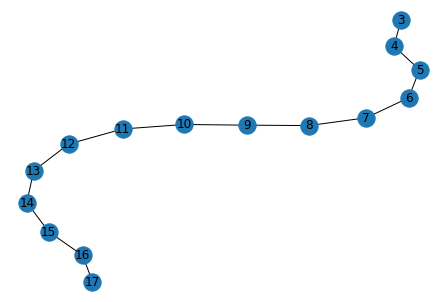

In [33]:
def color_remove(graph, center):
    """colors max degree vertex and removes 1st and 2nd adjacencies

    """
    
    orderFull = sorted(graph.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree

    #get just vertices in order
    order = []
    for i in range(len(orderFull)):
        order.append(orderFull[i][0])

    colorings.update({order[0]: color}) #assign current color to max node
    
    #remove 1st and 2nd adjacencies
    adj = [] #initialize list of adjacent vertices (will hold 1st and 2nd adjacencies)
    adj_1 = list(graph.neighbors(center)) #1st adjancies of center
    for node in adj_1: #add 1st adjancies to adj
        adj.append(node)

    #add 2nd adjacencies of center to adj
    for node in adj_1:
        for adj_2 in list(graph.neighbors(node)):
            if adj_2 not in adj: #only need set of adjacencies
                adj.append(adj_2)

    #make copy of inputted graph
    G1 = graph.__class__()
    G1.add_nodes_from(graph)
    G1.add_edges_from(graph.edges)

    #remove 1st and 2nd adjacent vertices (and their edges)
    G1.remove_nodes_from(adj)
    
    #update order based on what is deleted
    order = [x for x in order if x not in adj]
    
    return(G1, order)

test_graph,test_order = color_remove(graph, 0)
nx.draw(test_graph, with_labels = True)
print(colorings)

In [23]:
def remove_1_2_adj(graph, center, color):
    '''
    graph: graph we are passing in
    center: node to delete off of (node with max degree)
    color: the current color *not changing color now, may be useful later so put as param*
    
    recursively colors max degree vertex and removes 1st and 2nd adjacencies until graph is empty
    '''
    
    orderFull = sorted(graph.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree

    #get just vertices in order
    order = []
    for i in range(len(orderFull)):
        order.append(orderFull[i][0])
    
    
    colorings.update({order[0]: color}) #color max node current color
    adj = [] #initialize list of adjacent vertices (will hold 1st and 2nd adjacencies)
    adj_1 = list(graph.neighbors(center)) #1st adjancies of center
    for node in adj_1: #add 1st adjancies to adj
        adj.append(node)
    
    #add 2nd adjacencies of center to adj
    for node in adj_1:
        for adj_2 in list(graph.neighbors(node)):
            if adj_2 not in adj: #only need set of adjacencies
                adj.append(adj_2)
    
    #make copy of inputted graph
    G1 = graph.__class__()
    G1.add_nodes_from(graph)
    G1.add_edges_from(graph.edges)
    
    #remove 1st and 2nd adjacent vertices (and their edges)
    G1.remove_nodes_from(adj)
    
    #update order based on what is deleted
    order = [x for x in order if x not in adj]
    
    #call function again if graph is not empty
    if not nx.is_empty(G1):
        remove_1_2_adj(G1, order[0], color)
    else:
        print('DONE WITH RECURSION, IDK WHAT TO DO NOW')

remove_1_2_adj(graph, 0, color)
print(colorings)

DONE WITH RECURSION, IDK WHAT TO DO NOW
{0: 0, 4: 0, 7: 0, 10: 0, 13: 0, 16: 0}


In [6]:
def order_vertices(graph):
    """graph: input graph
    
    returns order of vertices from max to min degree
    """
    orderFull = sorted(graph.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree

    #get just vertices in order
    order = []
    for i in range(len(orderFull)):
        order.append(orderFull[i][0])
        
    return order

In [24]:
#testing what could go in a recursive function, to do these steps:
#go to next highest degree un-colored vertex, if connected to an already-colored vertex, currentColor += 2 (if not, currentColor += 1)
#go through same as above

v_uncolored = graph.__class__()
v_uncolored.add_nodes_from(graph)
v_uncolored.add_edges_from(graph.edges)

v_colored = []
for key in colorings.keys():
    v_colored.append(key)

v_uncolored.remove_nodes_from(v_colored) #make graph of just nodes that are uncolored

order_test = order_vertices(v_uncolored)
#print(order_test)
#print(f"already colored {colorings}")
#color next highest degree vertex according to pseudocode
for neighbor in list(graph.neighbors(order_test[0])):
    if neighbor in colorings:
        color += 2
        break
    else:
        color += 1
        break

colorings.update({order_test[0]: color})
print(colorings)

{0: 0, 4: 0, 7: 0, 10: 0, 13: 0, 16: 0, 2: 2}
